# Scan the enriched peptides
Notebook by L.M.Windeln

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import logomaker as lm
from matplotlib.ticker import MaxNLocator
from collections import Counter

In [6]:
folder = "C:/Users/lmwin/Desktop/"
df = pd.read_csv(f"{folder}01Analysis/df.csv", index_col=0)
df.head()

,initial,pan 1,pan 2,sequence,initial [%],pan 1 [%],pan 2 [%]
1,36.0,15021.0,503993.0,CRTYIL,0.003643,0.920008,15.909272
2,38.0,26779.0,286271.0,CRLYVL,0.003846,1.640163,9.036560
3,38.0,25260.0,119251.0,CVTYVL,0.003846,1.547127,3.764331
4,20.0,13145.0,109484.0,CRTIVL,0.002024,0.805106,3.456022
5,9.0,5683.0,97919.0,CKVFLL,0.000911,0.348073,3.090956


In [12]:
dfcrop = df[df["pan 2 [%]"]>df["pan 1 [%]"]]
dfcrop = dfcrop[dfcrop["pan 2"]>9]
dfcrop

,initial,pan 1,pan 2,sequence,initial [%],pan 1 [%],pan 2 [%]
1,36.0,15021.0,503993.0,CRTYIL,0.003643,0.920008,15.909272
2,38.0,26779.0,286271.0,CRLYVL,0.003846,1.640163,9.036560
3,38.0,25260.0,119251.0,CVTYVL,0.003846,1.547127,3.764331
4,20.0,13145.0,109484.0,CRTIVL,0.002024,0.805106,3.456022
5,9.0,5683.0,97919.0,CKVFLL,0.000911,0.348073,3.090956
...,...,...,...,...,...,...,...
6991,1.0,4.0,10.0,CQLWWV,0.000101,0.000245,0.000316
6997,3.0,5.0,10.0,CMVILV,0.000304,0.000306,0.000316
7011,3.0,3.0,10.0,CGVLGS,0.000304,0.000184,0.000316
7024,NaN,5.0,10.0,CLWPYP,NaN,0.000306,0.000316


In [13]:
# get the sequences of the enriched peptides after pan 2
sequences = dfcrop["sequence"].values

In [84]:
def scan80(seq1, seq2):
    for i in range(5):
        if seq2[0:i+1]+seq2[i+2:]==seq1[0:i+1]+seq1[i+2:]:
            return True
    return False
    
def scan(testSeq, allSeqs):
    # generate a list for the scan
    scanseqs=[]
    # iterate through all positions
    for i in range(5):
        for seq2 in allSeqs:
            #check for all amino acids but ignoring one
            if seq2[0:i+1]+seq2[i+2:]==testSeq[0:i+1]+testSeq[i+2:]:
                scanseqs.append(seq2[:6])
    return list(set(scanseqs))

In [133]:
#amino acids
lib=["G","A","V","L","I","P","F","Y","W","M","C","S","T","D","E","N","Q","R","H","K"]

c={'G':'#107335','A':'#368a12',
   'V':'#6a9c16','L':'#8a9c16',
   'I':'#9c9a16','P':'#b3690e',
   'F':'#3242a8','Y':'#781d8c','W':'#591e87',
   'M':'#e89105','C':'#e84505',
   'S':'#291db3','T':'#0545e8',
   'D':'#0c8dc9','E':'#09999e',
   'N':'#6c1e78','Q':'#058235',
   'R':'#ab4975','H':'#8f7e33','K':'#9c4141'}

def seqlogo(sequences,seq1, i= ""):
    if len(sequences)>=1:
        fig,ax=plt.subplots(1,1,figsize=(10,2.5))
        counts_mat=lm.alignment_to_matrix(sequences=sequences)
        counts_mat.head()
        logo=lm.Logo(counts_mat,ax=ax,font_name = 'arial')
        #makes the colours according to the table up there
        logo.style_glyphs('black')
        for k in (lib):
            logo.style_glyphs_in_sequence(".%s%s%s%s%s"%(k,k,k,k,k),color=c[k])
        #makes the colours for the first positon
        ax.yaxis.set_major_locator(MaxNLocator(4)) 
        ax.xaxis.set_major_locator(MaxNLocator(6)) 
        ax.tick_params(axis="both", which="major", labelsize=14)
        logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)
        logo.ax.set_xlabel("Position",fontsize=18)
        logo.ax.set_ylabel("Sequences", fontsize =18)
        ax.set_title(f"{seq1} unique: {len(Counter(sequences))}",fontsize=20)
        plt.savefig(f"{folder}/01Analysis/seqlogo{i}_{seq1}.png", dpi=300)
        plt.savefig(f"{folder}/01Analysis/seqlogo{i}_{seq1}.svg", dpi=300)
        plt.show()
        

In [80]:
scanned = [scan(seq, sequences) for seq in sequences[:25]]

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


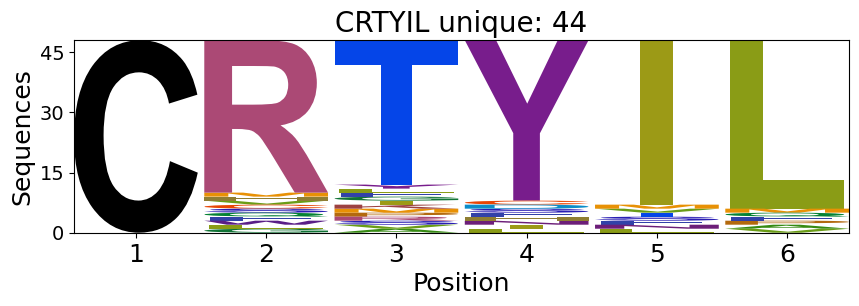

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


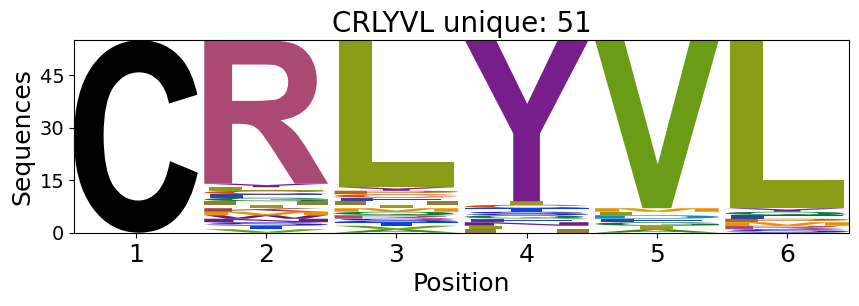

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


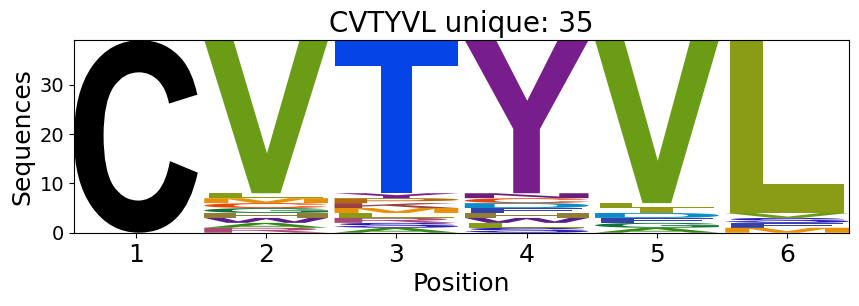

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


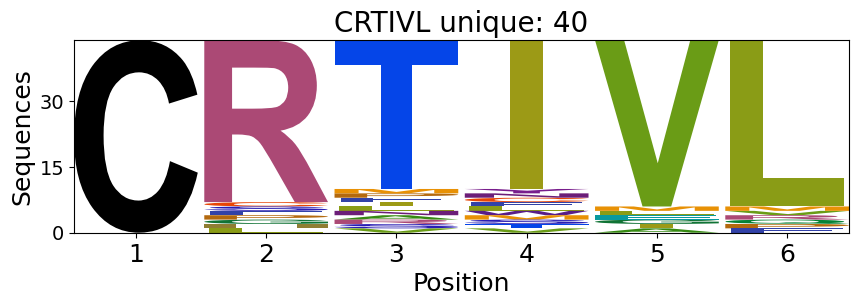

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


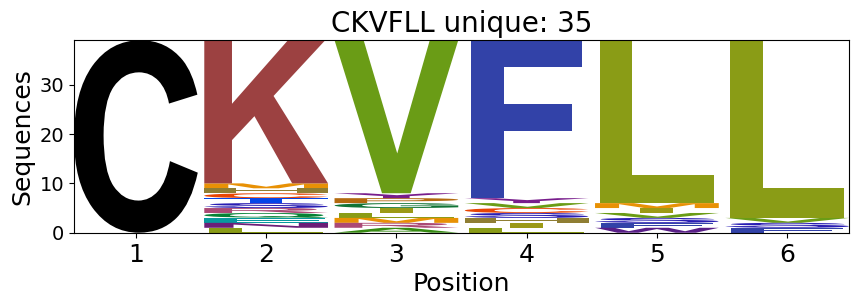

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


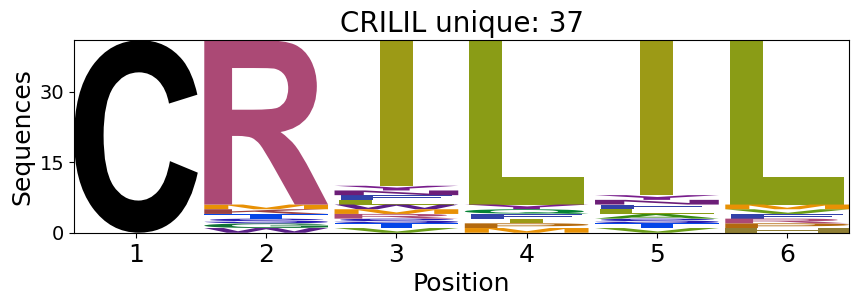

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


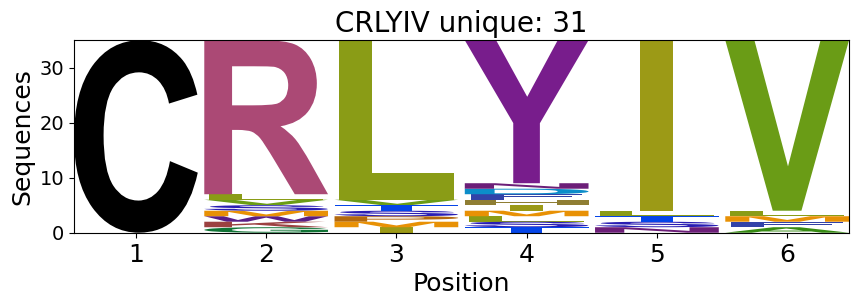

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


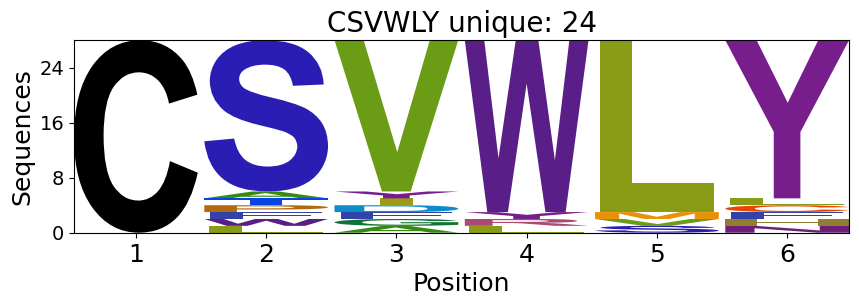

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


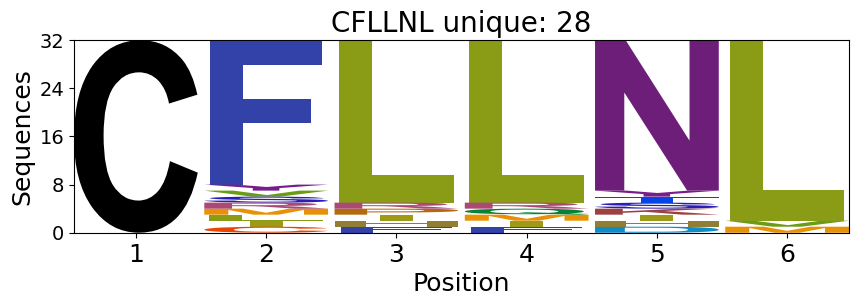

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


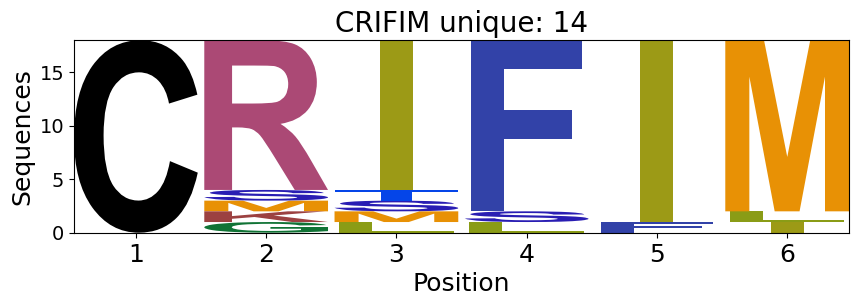

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


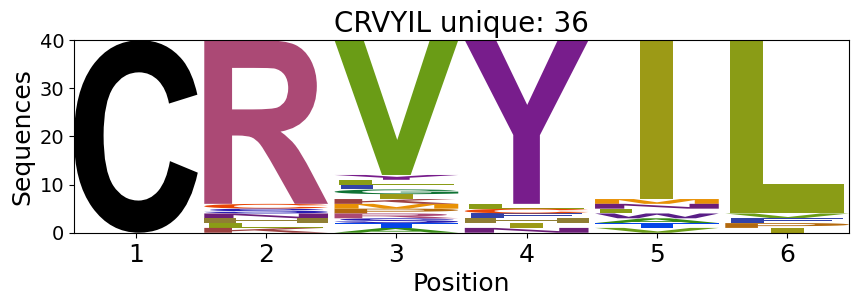

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


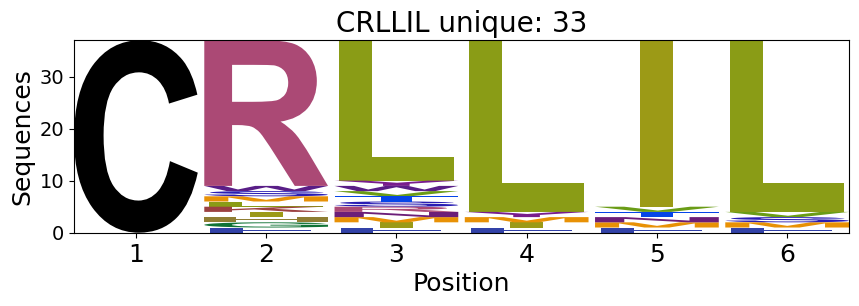

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


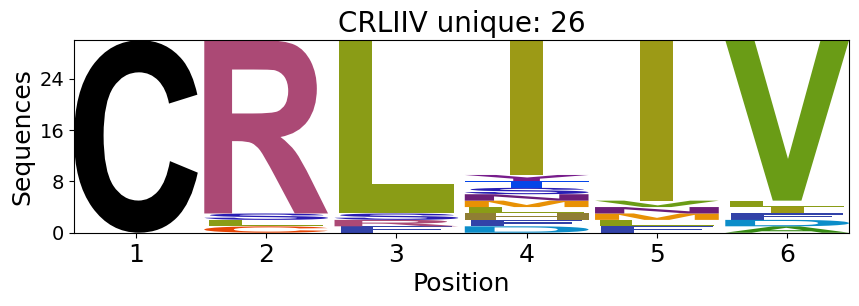

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


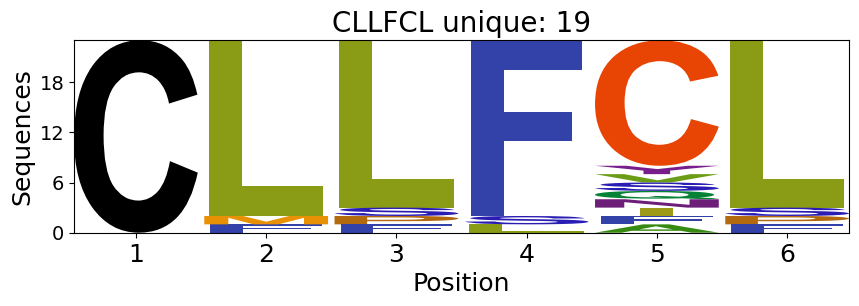

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


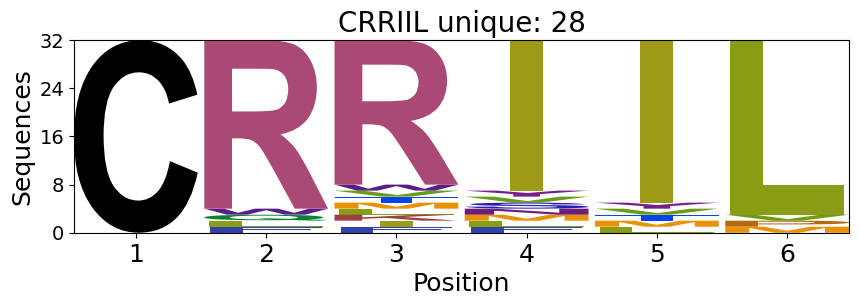

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


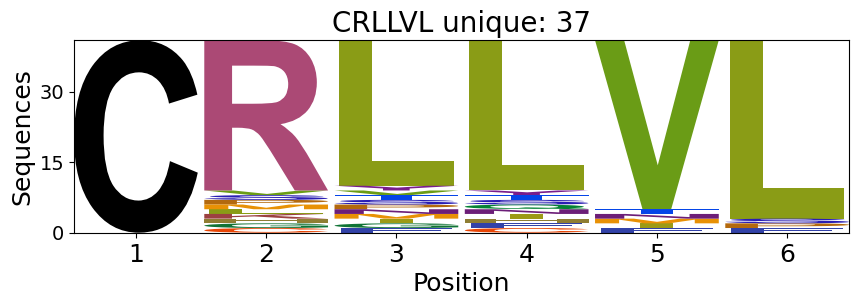

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


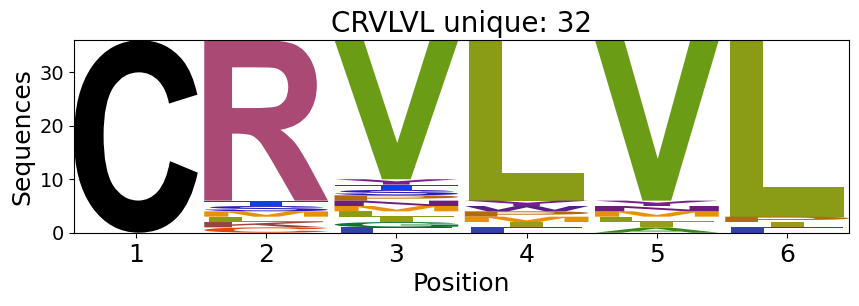

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


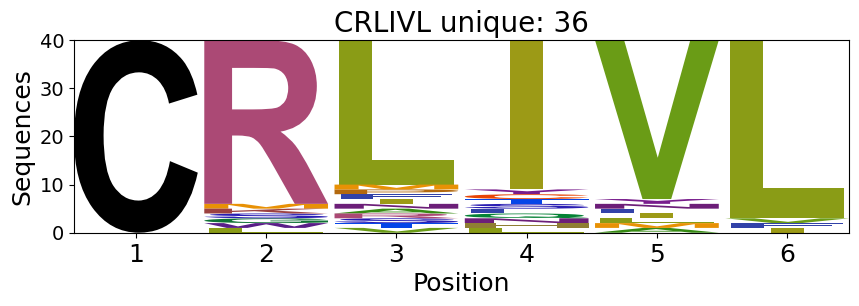

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


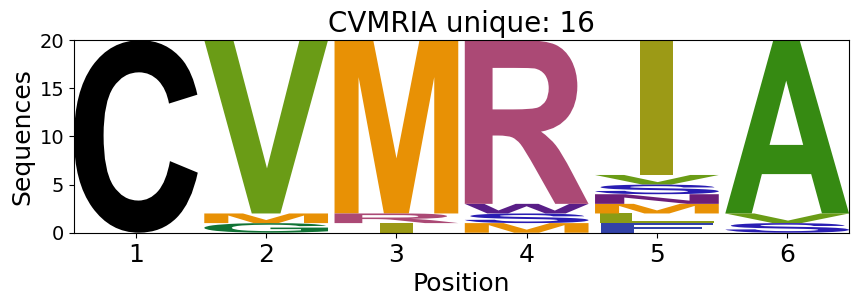

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


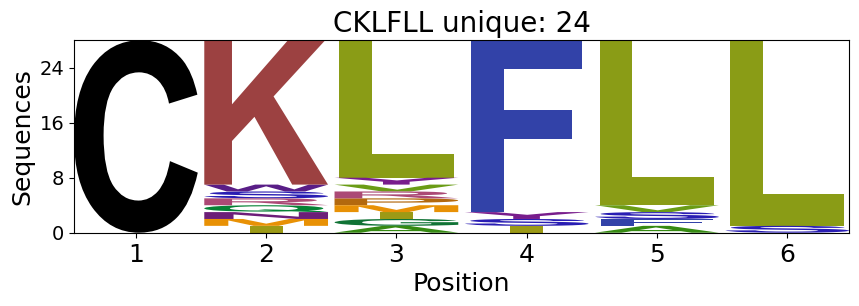

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


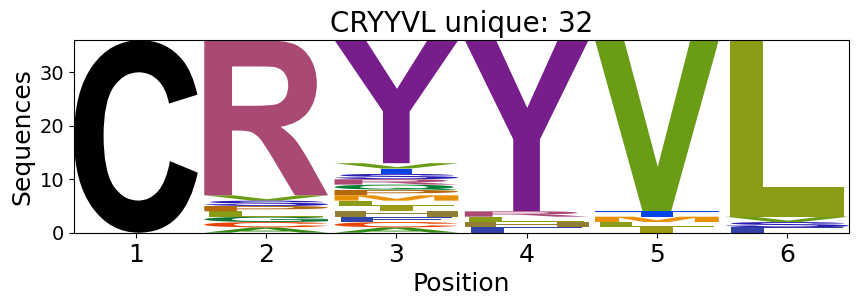

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


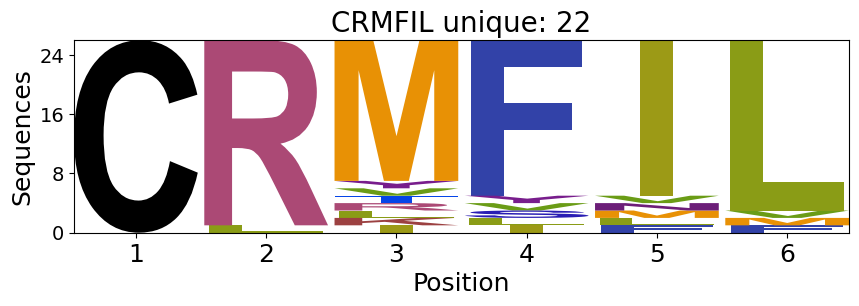

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


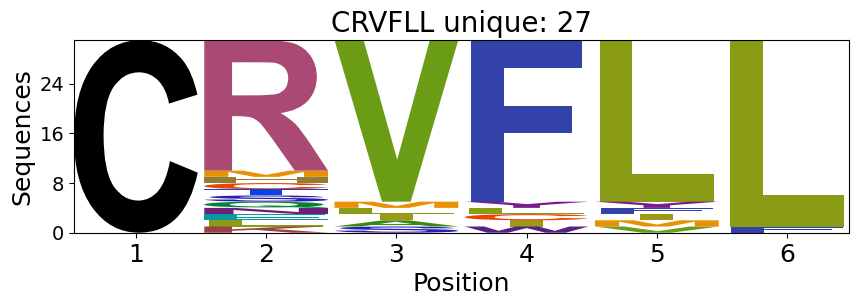

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


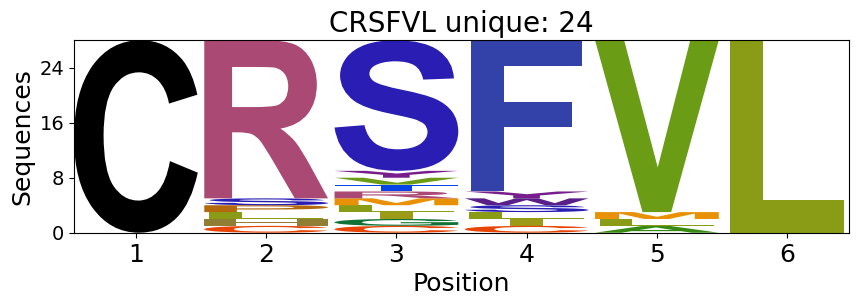

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2932158317.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


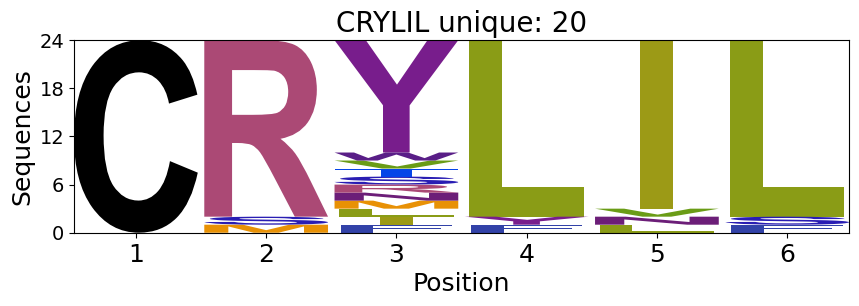

In [134]:
for i in range(25):
    seqlogo(scanned[i], sequences[i], i = str(i+1))

In [106]:
# calculate overlap
overlapped_seqs = []
overlapped_titles=[]
overlap = np.zeros((25,25))
lasttitle = ""
for i in range(25):
    li = scanned[i]
    for j in range(i+1, 25):
        lj= scanned[j]
        ol = set(li)&set(lj)
        overlap[i][j]=len(ol)/(len(set(lj+li)))
        if len(ol)/(len(set(lj+li)))>0.2:
            overlapped_seqs.append(list(set(li+lj)))
            overlapped_titles.append(f"{sequences[i]}-{sequences[j]}")

In [105]:
overlapped_titles

['CRTYIL-CRVYIL',
 'CRLYVL-CRLLVL',
 'CRLYVL-CRLIVL',
 'CRLYVL-CRYYVL',
 'CRTIVL-CRLIVL',
 'CKVFLL-CKLFLL',
 'CKVFLL-CRVFLL',
 'CRILIL-CRLLIL',
 'CRILIL-CRYLIL',
 'CRLYIV-CRLIIV',
 'CRLLIL-CRYLIL',
 'CRLLVL-CRVLVL',
 'CRLLVL-CRLIVL']

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2718037755.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


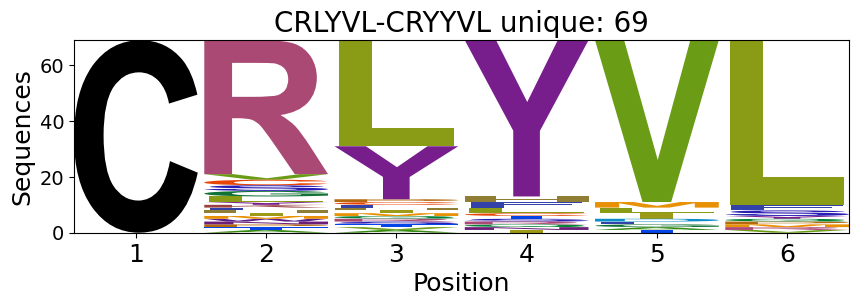

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2718037755.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


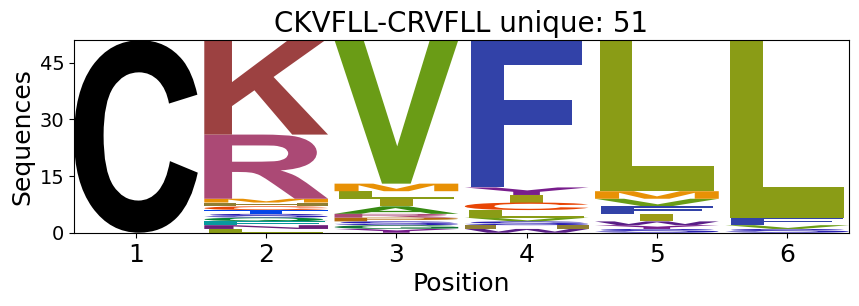

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2718037755.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


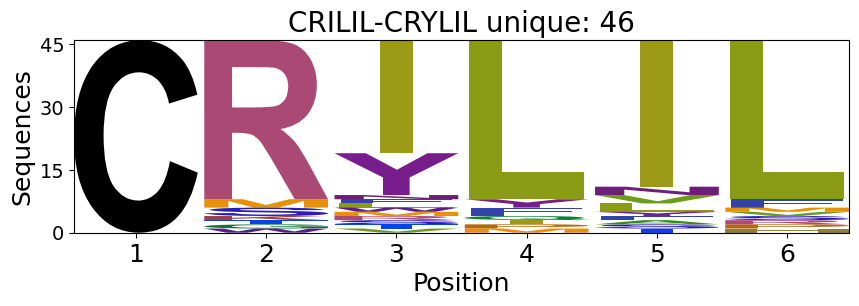

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2718037755.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


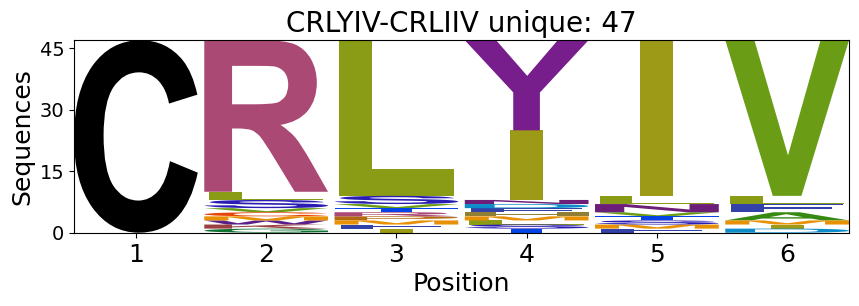

C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2718037755.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


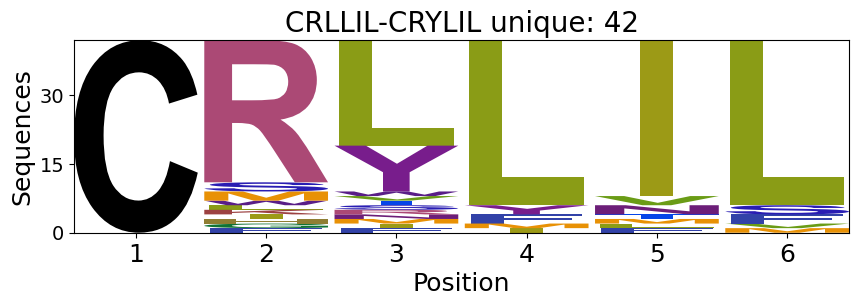

In [103]:
for seqs, title in zip(overlapped_seqs, overlapped_titles):
    seqlogo(seqs, title)


In [130]:
c1=["R"]#, "V", "K"]
#c2 = ["T", "L", "V"]
c3=["Y", "F", "L"]
#c4=["V", "L", "I"]
c5=["L"]
CR=[seq for seq in sequences if seq[1] in c1 and seq[3] in c3 and seq[5] == "L"]
print(len(CR))


139


In [131]:
total = 0
total_percent = 0
for seq in CR:
    ct = df[df["sequence"]==seq]
    total_percent +=ct["pan 2 [%]"].values[0]
    total +=ct["pan 2"].values[0]
print(total)
print(total_percent)

1265691.0
39.95337634788753


C:\Users\lmwin\AppData\Local\Temp\ipykernel_25424\2718037755.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  logo.ax.set_xticklabels(np.arange(0,7,1),fontsize=18)


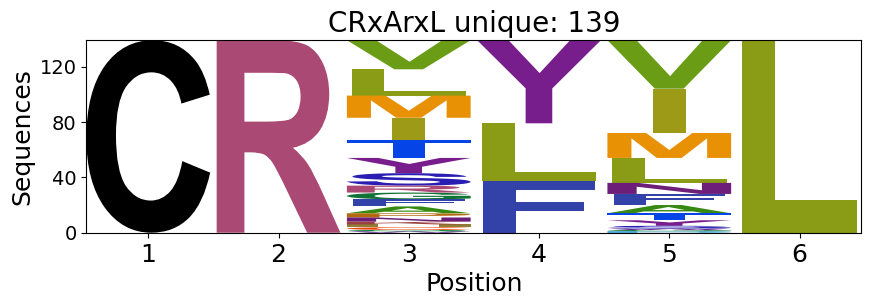

In [132]:
seqlogo(CR, "CRxArxL")